<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/Turning_exploratory_analysis_into_action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving ds_salaries_clean.csv to ds_salaries_clean.csv


In [ ]:
salaries = pd.read_csv('/content/ds_salaries_clean.csv')
print(salaries.head())

   Working_Year                 Designation Experience Employment_Status  \
0          2020              Data Scientist        Mid                FT   
1          2020  Machine Learning Scientist     Senior                FT   
2          2020           Big Data Engineer     Senior                FT   
3          2020        Product Data Analyst        Mid                FT   
4          2020   Machine Learning Engineer     Senior                FT   

  Employee_Location Company_Size  Remote_Working_Ratio  Salary_USD  
0                DE            L                     0     76227.0  
1                JP            S                     0    248257.0  
2                GB            M                    50    104100.0  
3                HN            S                     0     19097.0  
4                US            L                    50    143225.0  


In [ ]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


In [ ]:
# Afficher la fréquence relative de la designation ou catégorie de l'emploi
print(salaries["Designation"].value_counts(normalize=True))


Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager                    0.

Il semble que la science des données soit la classe la plus populaire et ait une représentation similaire. Néanmoins, les autres catégories ont des fréquences relatives assez différentes, ce qui n’est peut-être pas surprenant étant donné que le public cible est constitué de data scientists ! Compte tenu de la différence de fréquences relatives, pouvez-vous faire confiance au DataFrame des salaires pour représenter avec précision les rôles de direction ?

### 4.1.2. **Tableau croisé**

In [ ]:
# Tableau croisé	expérience et taille de l'entreprise
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))


Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [ ]:
#  Tableau croisé	la catégorie de l'emploi et taille de l'entreprise
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"]))

Company_Size                               L   M   S
Designation                                         
3D Computer Vision Researcher              0   1   0
AI Scientist                               2   2   3
Analytics Engineer                         0   4   0
Applied Data Scientist                     5   0   0
Applied Machine Learning Scientist         2   2   0
BI Data Analyst                            2   2   2
Big Data Architect                         0   1   0
Big Data Engineer                          4   2   2
Business Data Analyst                      4   1   0
Cloud Data Engineer                        1   0   1
Computer Vision Engineer                   0   4   2
Computer Vision Software Engineer          0   1   2
Data Analyst                              13  76   8
Data Analytics Engineer                    2   2   0
Data Analytics Lead                        1   0   0
Data Analytics Manager                     2   5   0
Data Architect                             3  

In [ ]:
# #	Croisez la catégorie d'emploi et la taille de l'entreprise
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                                          L              M  \
Designation                                                              
3D Computer Vision Researcher                       NaN    5165.000000   
AI Scientist                              121741.500000   63019.000000   
Analytics Engineer                                  NaN  167096.000000   
Applied Data Scientist                    167721.400000            NaN   
Applied Machine Learning Scientist        237754.000000   33550.500000   
BI Data Analyst                            88923.000000   94528.500000   
Big Data Architect                                  NaN   95200.000000   
Big Data Engineer                          27384.750000   80695.000000   
Business Data Analyst                      87132.000000   17609.000000   
Cloud Data Engineer                        85261.000000            NaN   
Computer Vision Engineer                            NaN   42467.750000   
Computer Vision Software Engineer     

il s'agit d'une fonction pratique pour examiner la combinaison de fréquences et trouver des statistiques agrégées. Il semble que le salaire moyen le plus élevé concerne les postes de gestion des données dans les grandes entreprises !

:# 4.2. **Extraction de fonctionnalités pour la corrélation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-11-e6336b57591e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(salaries.corr(), annot=True)


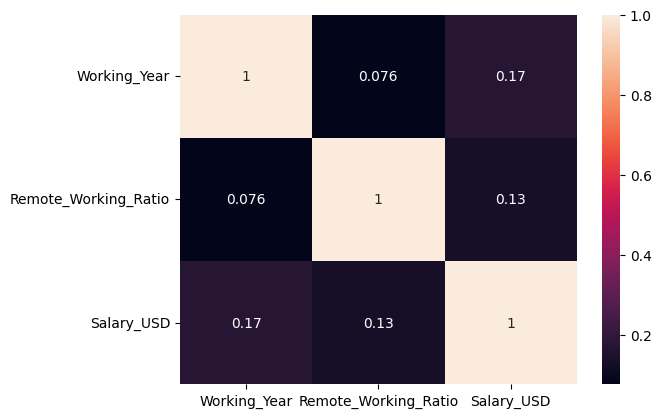

In [ ]:
# Obtenez le mois
#salaries["month"] = salaries["date_of_response"].dt.month

# Extraire le jour de la semaine
#salaries["weekday"] = salaries["date_of_response"].dt.weekday

# #	Créez une carte thermique ou heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

On dirait qu'il n'y a pas de relations significatives	entre nos variables numériques, voyons donc si la conversion de données numériques en classes offre
des informations supplémentaires.


In [ ]:
# Trouver le 25ème percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# enregistrer la mediane
salaries_median = salaries["Salary_USD"].median()

# Rassemblez le 75e centile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


On dirait que l’écart interquartile se situe entre 59 893 et 143 225 dollars !

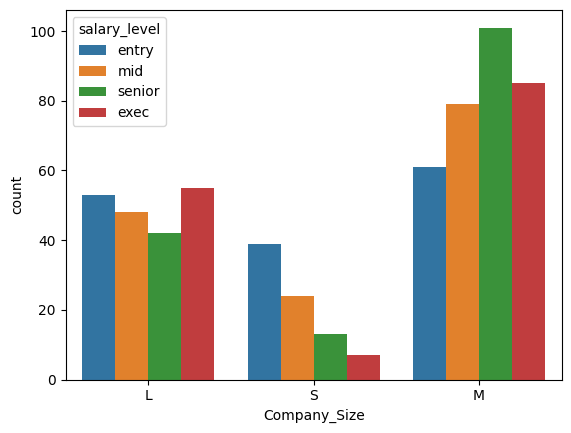

In [ ]:
# Créer des étiquettes de salaire
salary_labels = ["entry", "mid", "senior","exec"]
# Créer la liste des échelles salariales
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# # Créer un niveau de salaire
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Tracez le décompte des niveaux de salaire dans des entreprises de différentes tailles
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

En utilisant pd.cut() pour diviser les données numériques en catégories, vous pouvez voir qu'une grande proportion de travailleurs dans les petites entreprises reçoivent des salaires de niveau « d'entrée », tandis qu'un plus grand nombre de membres du personnel des entreprises de taille moyenne sont récompensés par un niveau « senior » de salaire.

## **Comparing salaries (Comparer les salaires)**

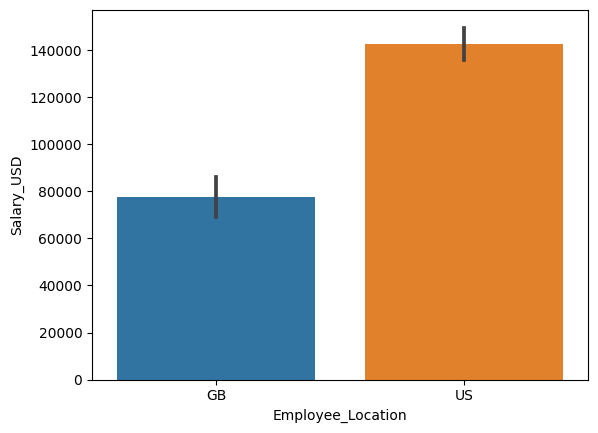

In [ ]:
# Filtrer pour les employés aux États-Unis ou en Grande-Bretagne
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# #	Créez un barplot des salaires par emplacement
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

En sous-regroupant les données, vous avez pu comparer directement les salaires entre les États-Unis et la Grande-Bretagne. La visualisation suggère que vous avez généré une hypothèse qui mérite d'être étudiée formellement pour déterminer s'il existe une réelle différence ou non.

# **Choosing a hypothesis (Choisir une hypothèse)**

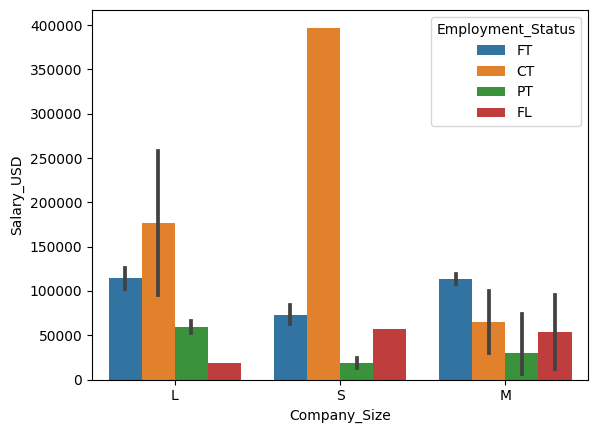

In [ ]:
# Créez un graphique à barres du salaire en fonction de la taille de l'entreprise, en tenant compte du statut d'emploi
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

Les entrepreneurs semblent être payés en moyenne davantage par les grandes entreprises, d'après les données, il s'agit donc d'une hypothèse raisonnable.